# Check if tracer has saturated the domain and how other species are changing with time

In [1]:
import os
import pandas as pd
import numpy as np

#Developed libraries for working with simulation results
import plots.saturated_steady_state as sssp
import analyses.transient as translys
from data_reader import data_processing as proc

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Parent directories

In [2]:
results_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
#output_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
raw_dir = "X:/Richards_flow_low_sat"

# Tracer concentration profile: Concentration profiles-1D and 2D
- Defining the function for flux averaged concentrations of tracer in 1D domain
- Defining the function for heatmaps of tracer concentrations in 2D
- Plotting select scenarios in 1D and 2D

In [3]:
species = proc.speciesdict("Unsaturated")
gvarnames = ["Tracer"]
print(species["Tracer"]["TecIndex"])

26


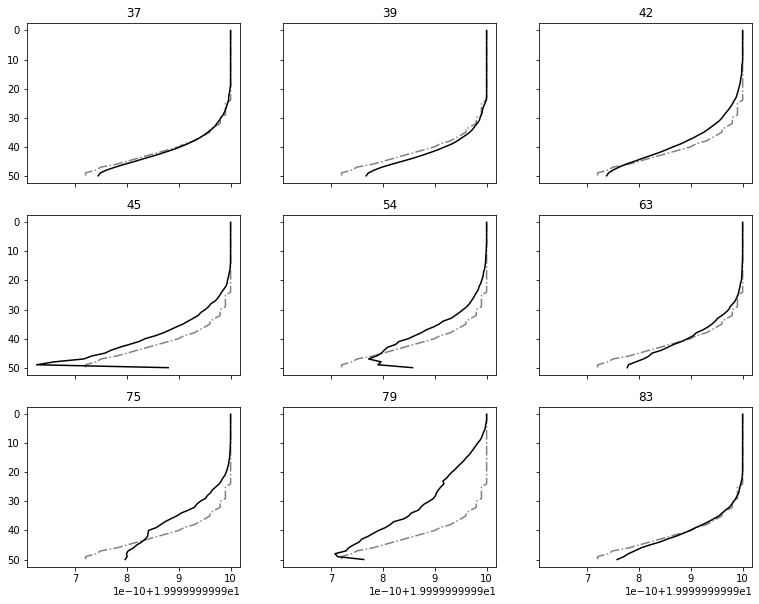

In [4]:
yindex = list(range(51))
Trial = ["37", "39", "42", "45", "54", "63", "75", "79", "83"]
figbig, axes = plt.subplots(3,3, figsize=(13, 10), sharey = True, sharex = True)
for t in Trial:
    for r in ["Equal"]:
        fileh = os.path.join(raw_dir, r + "AR_0/" + r + "AR_0_RF-AH_df.npy")
        datah = np.load(fileh)
        i = Trial.index(t)
        host = axes.flat[i]
        file = os.path.join(raw_dir, r+"AR_0/"+ r + "AR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        conctime, TotalFlow, Headinlettime = translys.conc_time (data,0,50,0,30, 51, gvarnames,"Unsaturated")
        conctimeh, TotalFlowh, Headinlettimeh = translys.conc_time (datah,0,50,0,30, 51, gvarnames,"Unsaturated")
        host.plot(conctimeh[-1, :, 0],yindex,label=gvarnames[0],color='grey',linestyle="-.")
        host.plot(conctime[-1, :, 0],yindex,label=gvarnames[0],color='k',linestyle="-")
        host.set_title(t)
        figbig.gca().invert_yaxis()

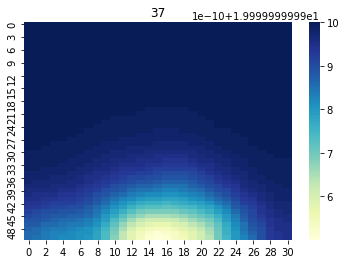

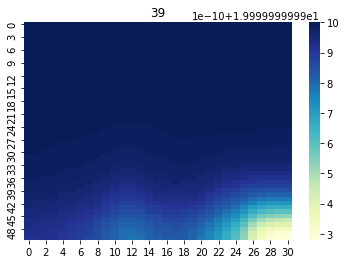

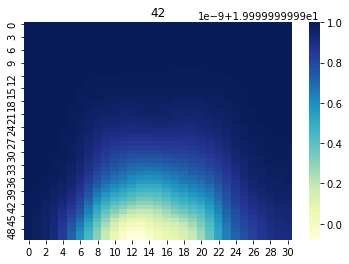

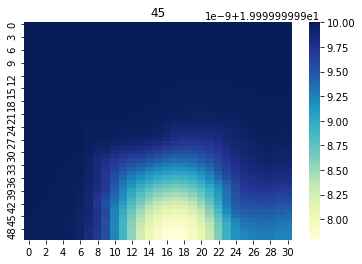

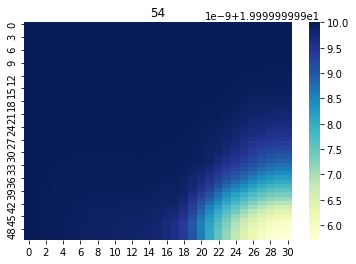

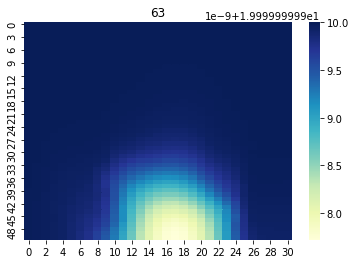

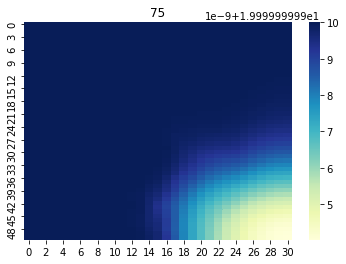

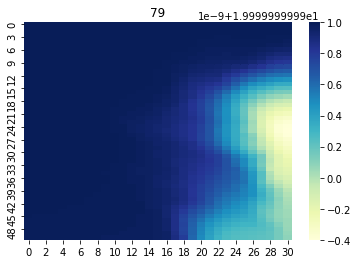

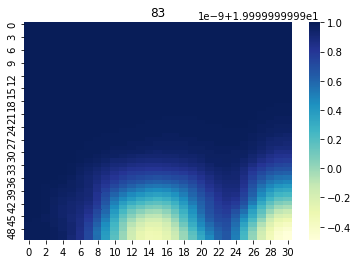

In [5]:
r = "Equal"
for t in Trial:
    file = os.path.join(raw_dir, r + "AR_0/", r+"AR_0_RF-A"+str(t)+"_df.npy")
    data = np.load(file)
    plt.figure()
    sns.heatmap (data[-2, -1, :, :], cmap = "YlGnBu")
    plt.title(t)

# Reactive species: Concentration profiles-1D and 2D
- Defining the function for flux averaged concentrations of reactive species in 1D domain
- Defining the function for heatmaps of reactive species concentrations in 2D
- Plotting select scenarios in 1D and 2D

In [6]:
def profile1d(Trial):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)

    #Defining base figure parameters
    dashedline = mlines.Line2D([], [], linestyle = '--', color='grey', markersize=15, label='Homogeneous')
    solidline = mlines.Line2D([], [], linestyle = 'solid', color='grey', markersize=15, label='Heterogeneous')
    blue_patch = mpatches.Patch(color="blue", label= 'Ammonium', alpha = 0.5)
    red_patch = mpatches.Patch(color = "red", label =  'DO', alpha = 0.5)
    black_patch = mpatches.Patch(color="black", label= 'DOC', alpha = 0.5)
    green_patch = mpatches.Patch(color="darkgreen", label='Nitrate', alpha = 0.5)
    patchlist = [blue_patch, green_patch, red_patch, black_patch, dashedline, solidline]
    legendsize = 16
    axissize = 16
    ticksize = 14
    titlesize = 20        
    
    Regimes = ["Slow", "Equal", "Fast"]
    trialist = proc.masterscenarios()
    species = proc.speciesdict("Unsaturated")
    gvarnames = ["DO", "DOC", "Ammonium", "Nitrate"]
    cvars = list(species[g]['TecIndex'] for g in gvarnames)
    velindex = 2
    colors = ["red", "black", "blue", "darkgreen"]
    columntitles = ["Slow flow", "Medium flow", "Fast flow"]
    pad = 230 
    figbig, axes = plt.subplots(3,3, figsize=(13, 10), sharey = True, sharex = True)
    for t in Trial:
        for r in Regimes:
            fileh = os.path.join(raw_dir, r + "AR_0/" + r + "AR_0_RF-AH_df.npy")
            datah = np.load(fileh)
            i = Trial.index(t)*len(Regimes) + Regimes.index(r)
            host = axes.flat[i]
            file = os.path.join(raw_dir, r+"AR_0/"+ r + "AR_0_RF-A"+str(t)+"_df.npy")
            data = np.load(file)
            conctime, TotalFlow, Headinlettime = translys.conc_time (data,0,50,0,30, 51, gvarnames,"Unsaturated")
            conctimeh, TotalFlowh, Headinlettimeh = translys.conc_time (datah,0,50,0,30, 51, gvarnames,"Unsaturated")
            yindex = list(range(51))
            #fig, host = axe.subplots()
            host.plot(conctimeh[-1, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-.")
            host.plot(conctime[-1, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-")
            host.plot(conctimeh[-1, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-.")
            host.plot(conctime[-1, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-",)
            host.plot(conctimeh[-5, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-.")
            host.plot(conctime[-5, :, 0],yindex,label=gvarnames[0],color=colors[0],linestyle="-")
            host.plot(conctimeh[-5, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-.")
            host.plot(conctime[-5, :, 1],yindex,label=gvarnames[1],color=colors[1],linestyle="-",)
            par1 = host.twiny()
            par2 = host.twiny()
    
            # Offset the top spine of par2.  The ticks and label have already been
            # placed on the top by twiny above.
            par2.spines["top"].set_position(("axes", 1.2))
            # Having been created by twinx, par2 has its frame off, so the line of its
            # detached spine is invisible.  First, activate the frame but make the patch
            # and spines invisible.
            make_patch_spines_invisible(par2)
            # Second, show the right spine.
        
            par1.plot(conctimeh[-1, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-.")
            par1.plot(conctime[-1, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-")
            par2.plot(conctimeh[-1, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-.")
            par2.plot(conctime[-1, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-")
            par1.plot(conctimeh[-5, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-.")
            par1.plot(conctime[-5, :, 2],yindex,label=gvarnames[2],color=colors[2],linestyle="-")
            par2.plot(conctimeh[-5, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-.")
            par2.plot(conctime[-5, :, 3],yindex,label=gvarnames[3],color=colors[3],linestyle="-")
    
            host.set_ylim(0, 51)
            host.set_xlim(0, 800)
            par1.set_xlim(30, 60)
            par2.set_xlim(50, 260)
            host.xaxis.label.set_color("black")
            tkw = dict(size=4, width=1.5, labelsize=ticksize)
            host.tick_params(axis="x", colors="black", **tkw)
            host.tick_params(axis="y", **tkw)
            if i < 3:
                host.set_title (r + " flow", fontsize = axissize)
                par2.spines["top"].set_visible(True)
                par1.xaxis.label.set_color("blue")
                par2.xaxis.label.set_color("darkgreen")
                par1.tick_params(axis="x", colors="blue", **tkw)
                par2.tick_params(axis="x", colors="darkgreen", **tkw)
                par1.set_xlabel(str(gvarnames[2]) + " (uM)", fontsize=axissize)
                par2.set_xlabel(str(gvarnames[3]) + " (uM)", fontsize=axissize)
            elif i > 5:
                host.set_xlabel("DOC, DO (uM)", fontsize=axissize)
                par1.set_xticks([])
                par2.set_xticks([])
            else:
                par1.set_xticks([])
                par2.set_xticks([])
    figbig.gca().invert_yaxis()
    figbig.subplots_adjust(top=1.0, hspace = 0.2, wspace = 0.2)               
    for t,a in zip(Trial[::-1],range(3)):
        plt.annotate("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                     xy=(0.1, 0.17), xytext=(-50, 0.7 + pad*a),
                    xycoords='figure fraction', textcoords='offset points',
                    rotation = "vertical",
                    size='large', ha='center', va='baseline',
                    fontsize = 16)
        axes.flat[3*a].set_ylabel("Y (cm)", fontsize=axissize)
    plt.legend(handles = patchlist, ncol = 3, fontsize = legendsize,
               bbox_to_anchor = (-0.2,-0.6),
               loc = 'lower right')
    
    return None

def profile2d(Trial, gvarnames):
    import matplotlib.gridspec as gridspec
    Regimes = ["Slow", "Equal", "Fast"]
    trialist = proc.masterscenarios()
    species = proc.speciesdict("Unsaturated")
    velindex = 2
    colorscheme = 'YlGnBu'
    columntitles = ["Velocity\ndistribution pattern", "Slow\nflow", "Medium\nflow", "Fast\nflow"]
    fig = plt.figure(figsize=(14, 20))
    outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)
    pad = 210
    for t in Trial:
        #file = os.path.join(raw_dir, "EqualAR_0/EqualAR_0_RF-A"+str(t)+"_df.npy")
        file = os.path.join(raw_dir, "SlowAR_0/SlowAR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        left = gridspec.GridSpecFromSubplotSpec(1, 1,
                    subplot_spec=outer[4*Trial.index(t)], wspace=0.3, hspace=0.1)
        axe = plt.Subplot(fig, left[0])
        velocity = abs(data[velindex, -1, :, :])
        sns.heatmap(velocity, cmap = colorscheme, ax = axe, cbar = False)
        axe.set_ylabel ("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                       rotation = "vertical", fontsize = 16, ha = "center")
        axe.set_xticks([])
        axe.set_yticks([])
        fig.add_subplot(axe)
    
        for r in Regimes:
            i = Trial.index(t)*len(Regimes) + Regimes.index(r) + Trial.index(t) + 1
            if i%4 != 0:
                inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                         subplot_spec=outer[i], wspace=0.4, hspace=0.15)
                file = os.path.join(raw_dir, r + "AR_0/", r+"AR_0_RF-A"+str(t)+"_df.npy")
                data = np.load(file)
                for g in gvarnames:
                    axe = plt.Subplot(fig, inner[gvarnames.index(g)])
                    sns.heatmap (data[species[g]["TecIndex"], -1, :, :], cmap = colorscheme, ax= axe)
                    axe.set_title(g, fontsize = 13, ha = "center")
                    axe.set_xticks([])
                    axe.set_yticks([])
                    fig.add_subplot(axe)
    for a in range(4):
        plt.annotate(columntitles[a], xy=(0.15, 0.92), xytext=(0.0 + pad*a, 10),
                    xycoords='figure fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline',
                    fontsize = 16)
    #fig.show()
    
    return None

## Reactive species: 1D profile

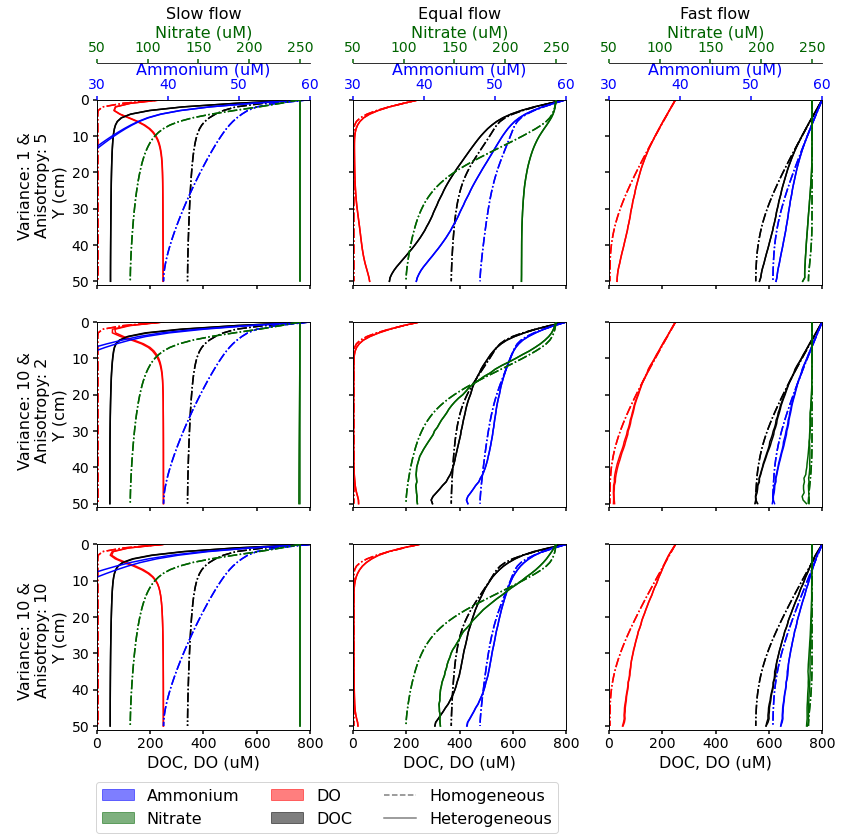

In [7]:
modeltrial = ["50", "73", "63"]
profile1d(modeltrial)
#picname = os.path.join(output_dir, "dissolved_species_1D.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
#picname = os.path.join(ouput_dir, "dissolved_species_1D.pdf")
#plt.savefig(picname, bbox_inches = 'tight', pad_inches = 0.1)

### Reactive species: 1D profile: Takeaways
- The flux averaged concentration profile follows trends of the saturated scenarios.
- Homogeneous domain has higher or equal removal of reactive species compared to the heterogeneous scenarios with the exception of Nitrate in the fast flow regime.
- Exception: Nitrate is consumed to a higher extent in the heterogeneous domains in the fast flow regime compared to the base case (homogeneous domain).

## Reactice species: 2D profile/heatmaps

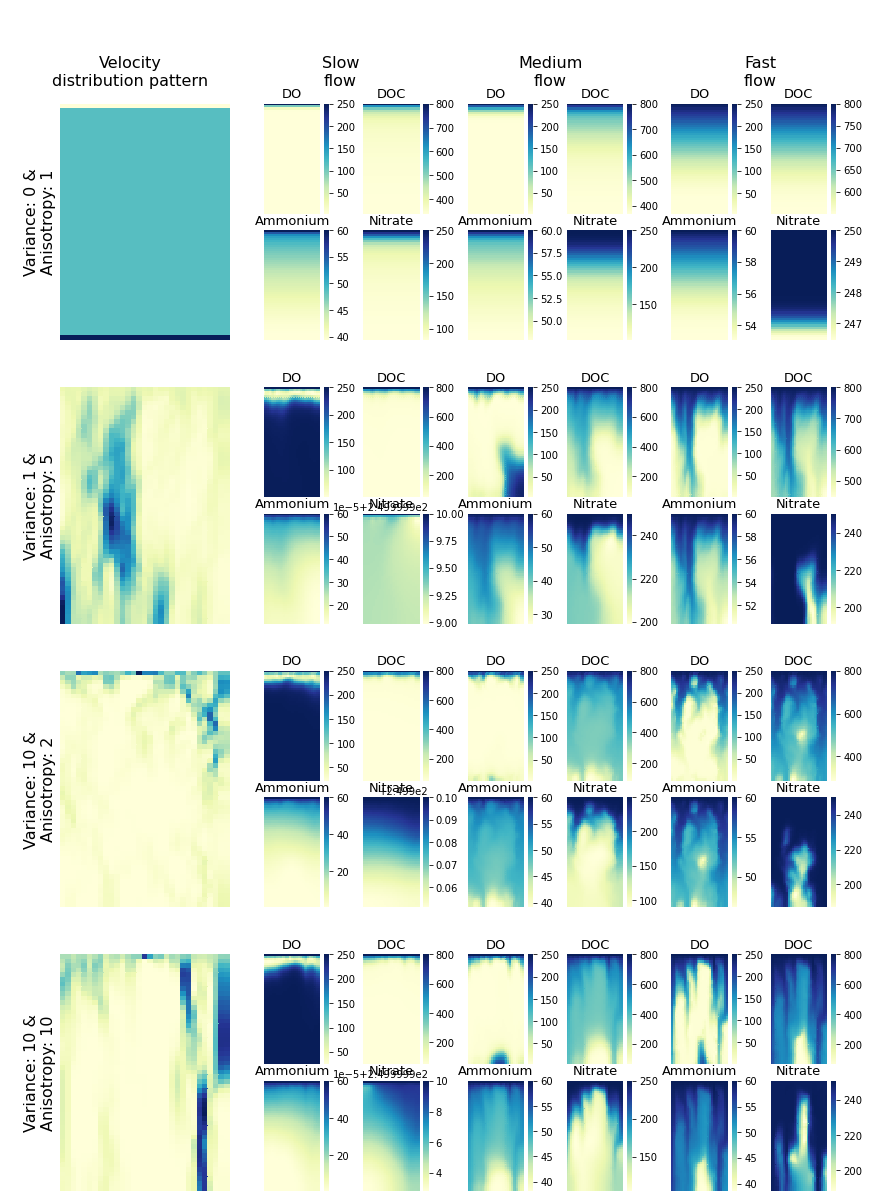

In [8]:
profile2d(["H","50", "73", "63"], ["DO", "DOC", "Ammonium", "Nitrate"])

### Reactive species: 2D profile: Takeaways

- DOC/DO are persistent along preferential flowpaths
- Reduction of nitrate kicks in further downgradient along the preferential flowpaths (if at all) or in low permeability zones.

# Visualize velocities and saturation for context

- Units of velocity are m/d
- P is Pressure (kPa)
- Sat is saturation (m3/m3) varying betwen 0.2 and 0.8. So sat = 0.8 means effective saturation = 1, and sat = 0.2 means effective saturation = 0

<ipython-input-9-22f39dbd5610>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


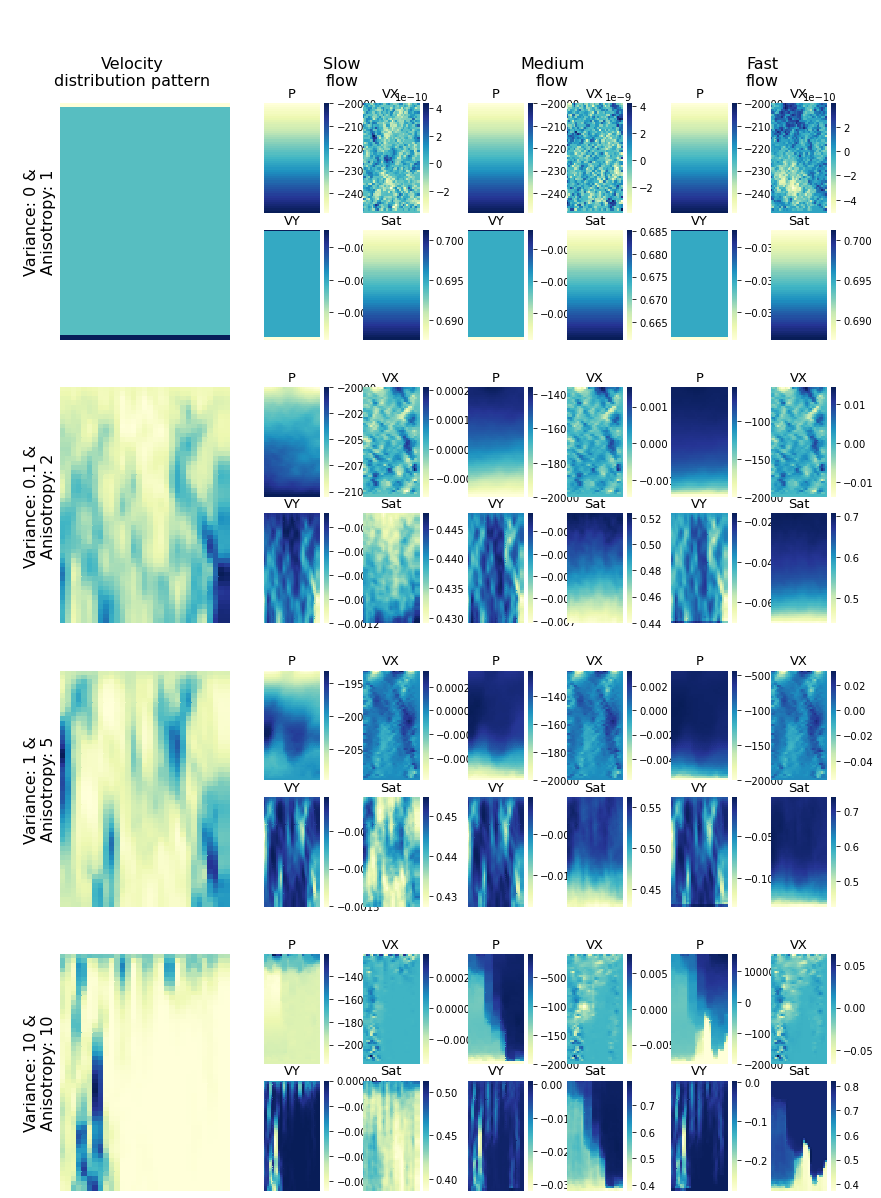

In [9]:
import matplotlib.gridspec as gridspec
Regimes = ["Slow", "Equal", "Fast"]
trialist = proc.masterscenarios()
Trial = ["H","37", "41", "45"]
species = proc.speciesdict("Unsaturated")
gvarnames = ["P","VX", "VY", "Sat"]
gindx = [0,1,2,4]
velindex = 2
colorscheme = 'YlGnBu'
columntitles = ["Velocity\ndistribution pattern", "Slow\nflow", "Medium\nflow", "Fast\nflow"]
fig = plt.figure(figsize=(14, 20))
outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)
pad = 210
for t in Trial:
    file = os.path.join(raw_dir, "SlowAR_0/SlowAR_0_RF-A"+str(t)+"_df.npy")
    data = np.load(file)
    left = gridspec.GridSpecFromSubplotSpec(1, 1,
                subplot_spec=outer[4*Trial.index(t)], wspace=0.3, hspace=0.1)
    axe = plt.Subplot(fig, left[0])
    velocity = abs(data[velindex, -1, :, :])
    sns.heatmap(velocity, cmap = colorscheme, ax = axe, cbar = False)
    axe.set_ylabel ("Variance: " + str(trialist[t]["Het"])+ " &\nAnisotropy: " + str(trialist[t]["Anis"]),
                       rotation = "vertical", fontsize = 16, ha = "center")
    axe.set_xticks([])
    axe.set_yticks([])
    fig.add_subplot(axe)    
    for r in Regimes:
        i = Trial.index(t)*len(Regimes) + Regimes.index(r) + Trial.index(t) + 1
        if i%4 != 0:
            inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                        subplot_spec=outer[i], wspace=0.4, hspace=0.15)
            file = os.path.join(raw_dir, r + "AR_0/", r+"AR_0_RF-A"+str(t)+"_df.npy")
            data = np.load(file)
            for g in gvarnames:
                axe = plt.Subplot(fig, inner[gvarnames.index(g)])
                sns.heatmap (data[gindx[gvarnames.index(g)], -1, :, :], cmap = colorscheme, ax= axe)
                axe.set_title(g, fontsize = 13, ha = "center")
                axe.set_xticks([])
                axe.set_yticks([])
                fig.add_subplot(axe)
for a in range(4):
    plt.annotate(columntitles[a], xy=(0.15, 0.92), xytext=(0.0 + pad*a, 10),
                xycoords='figure fraction', textcoords='offset points',
                size='large', ha='center', va='baseline',
                fontsize = 16)
fig.show()

In [65]:
Regimes = ["Slow", "Equal", "Fast"]
trialist = proc.masterscenarios()
Trial = list(trialist.keys())
species = proc.speciesdict("Unsaturated")
gvarnames = ["P","VX", "VY", "Sat", "Tracer"]
gindx = [0,1,2,4]
velindex = 2
vedge = 0.01/2
velem = 0.01
por = 0.2
def effsat(data):
    slope = 1/(0.8-0.2)
    constant = -1/3
    sat = slope*data + constant
    return sat
row = []
for r in Regimes:
    for t in Trial[:-1]:
        file = os.path.join(raw_dir, r+"AR_0", r+ "AR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        velx = data[1, -1, :, :]
        vely = data[2, -1, :, :]
        sat = effsat(data[4,-1,:,:])
        fedge = (np.sqrt(velx[0,0]**2 + vely[0,0]**2)*sat[0,0] + (velx[0,-1]**2 + vely[0,-1]**2)*sat[0,-1]+
       np.sqrt (velx[-1,0]**2 + vely[-1,0]**2)*sat[-1,0]+np.sqrt(velx[-1,-1]**2 + vely[-1,-1]**2)*sat[-1,-1])*vedge**2*por
        fboundaries = (sum(np.sqrt(velx[0,1:-1]**2 + vely[0,1:-1]**2)*sat[0,1:-1] +
                           np.sqrt(velx[-1,1:-1]**2 + vely[-1,1:-1]**2)*sat[-1,1:-1])+
            sum(np.sqrt(velx[1:-1,0]**2 + vely[1:-1,0]**2)*sat[1:-1,0]+
            np.sqrt(velx[1:-1,-1]**2 + vely[1:-1,-1]**2)*sat[1:-1,-1]))*vedge*velem*por
        felem = np.sum(np.sqrt(velx[1:-1,1:-1]**2 + vely[1:-1,1:-1]**2)*sat[1:-1,1:-1])*velem*velem*por
        fluxtotal = fedge + fboundaries + felem
        flux_avg = (fedge + fboundaries + felem)/(0.15*por)
        veledge = (np.sqrt(velx[0,0]**2 + vely[0,0]**2) + np.sqrt(velx[0,-1]**2 + vely[0,-1]**2)+
       np.sqrt (velx[-1,0]**2 + vely[-1,0]**2)+np.sqrt(velx[-1,-1]**2 + vely[-1,-1]**2))*vedge**2*por
        velboundaries = (sum(np.sqrt(velx[0,1:-1]**2 + vely[0,1:-1]**2) + np.sqrt(velx[-1,1:-1]**2 + vely[-1,1:-1]**2))+
        sum(np.sqrt(velx[1:-1,0]**2 + vely[1:-1,0]**2)+np.sqrt(velx[1:-1,-1]**2 + vely[1:-1,-1]**2)))*vedge*velem*por
        velelem = np.sum(np.sqrt(velx[1:-1,1:-1]**2 + vely[1:-1,1:-1]**2))*velem*velem*por
        veltotal = (veledge + velboundaries + velelem)/(0.15*por)
        #velcs = np.sum((velx**2 + vely**2)*sat*0.01*0.01, axis = -1)
        #meanvel = np.sum(velcs)/(0.3*0.5*sum(sat))
        #meansat = np.sum(data[4,-1,:,:])/0.5*0.3
        satedge = (sat[0,0] + sat[0,-1]+sat[-1,0]+sat[-1,-1])*vedge**2*por
        satboundaries = (sum(sat[0,1:-1] + sat[-1,1:-1])+ sum(sat[1:-1,0]+sat[1:-1,-1]))*vedge*velem*por
        satelem = np.sum(sat[1:-1,1:-1])*velem*velem*por
        sattotal = (satedge + satboundaries + satelem)/(0.15*por)
        row.append([r,t,fluxtotal, flux_avg, veltotal, sattotal])

In [66]:
meanvelocity = pd.DataFrame.from_records(row,columns = ["Regime", "Trial", "Total_flux","Avg_flux","Avg_Velocity", "Saturation"])    
meanvelocity.to_csv(os.path.join(results_dir,"low_sat_total_velocity_saturation.csv"))

In [67]:
print(meanvelocity.groupby(["Regime"])["Saturation"].mean())
print(meanvelocity.groupby(["Regime"])["Avg_flux"].mean())
print(meanvelocity.groupby(["Regime"])["Avg_Velocity"].mean())

Regime
Equal    0.587321
Fast     0.796357
Slow     0.395520
Name: Saturation, dtype: float64
Regime
Equal    0.002377
Fast     0.030556
Slow     0.000157
Name: Avg_flux, dtype: float64
Regime
Equal    0.003993
Fast     0.037555
Slow     0.000385
Name: Avg_Velocity, dtype: float64


In [71]:
withoutH = meanvelocity[meanvelocity.Trial!="H"]
print(withoutH.groupby(["Regime"])["Saturation"].mean())
print(withoutH.groupby(["Regime"])["Total_flux"].mean())
print(withoutH.groupby(["Regime"])["Avg_Velocity"].mean())

Regime
Equal    0.583046
Fast     0.795775
Slow     0.386410
Name: Saturation, dtype: float64
Regime
Equal    0.000071
Fast     0.000916
Slow     0.000005
Name: Total_flux, dtype: float64
Regime
Equal    0.003998
Fast     0.037546
Slow     0.000385
Name: Avg_Velocity, dtype: float64


#### Average velocities vary between different domains.
#### Check average permeability

In [42]:
Regimes = ["Slow", "Equal", "Fast"]
trialist = proc.masterscenarios()
Trial = list(trialist.keys())
species = proc.speciesdict("Unsaturated")
row = []
for r in Regimes:
    for t in Trial[1:]:
        file = os.path.join(raw_dir, r+"AR_0", "RF-A"+str(t),"A"+str(t)+"-T.dat")
        data = np.loadtxt(file, skiprows = 11, usecols = (3), max_rows = 1581)
        meanratio = np.mean(data)
        row.append([r,t, meanratio])
meanvelocity = pd.DataFrame.from_records(row,columns = ["Regime", "Trial", "MeanRatio"])

In [43]:
meanvelocity.to_csv(os.path.join(results_dir,"low_sat_mean_permeability.csv"))